In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Define a simple CNN-based OCR model
class OCRModel(nn.Module):
    def __init__(self, num_classes=10):
        super(OCRModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Check if GPU is available and move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OCRModel(num_classes=10).to(device)

# Load the dataset (e.g., MNIST for digit recognition)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model on GPU
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Finished Training")

# Save the trained model
torch.save(model.state_dict(), "gpu_ocr_model.pth")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17228142.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 464121.43it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3687472.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5563822.65it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.1503
Epoch [2/5], Loss: 0.0457
Epoch [3/5], Loss: 0.0308
Epoch [4/5], Loss: 0.0231
Epoch [5/5], Loss: 0.0173
Finished Training


In [3]:
print(model)

OCRModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [4]:
from google.colab import files
files.download('gpu_ocr_model.pth')

!ls -l gpu_ocr_model.pth

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-rw-r--r-- 1 root root 1689864 Aug 22 09:45 gpu_ocr_model.pth


**GPU model**

In [5]:
import torch
import torch.nn as nn

# Load the GPU-based OCR model
gpu_model = torch.load('gpu_ocr_model.pth')

# Print the model architecture
print(gpu_model)

OrderedDict([('conv1.weight', tensor([[[[ 5.1306e-02, -7.0419e-03,  3.0156e-02],
          [-2.1983e-01,  3.3173e-01, -9.4756e-02],
          [-5.5763e-02,  4.1890e-01, -2.6104e-01]]],


        [[[ 2.2077e-01,  2.8256e-01, -3.3709e-01],
          [-4.6489e-02,  2.4167e-01, -2.7629e-01],
          [ 2.2518e-01,  1.1550e-02, -2.2540e-01]]],


        [[[ 4.1839e-01,  1.4723e-01,  3.4038e-01],
          [-1.1838e-01,  1.0971e-01,  1.4462e-01],
          [-3.5581e-01, -2.8030e-01, -2.6881e-01]]],


        [[[-2.0447e-01, -6.8814e-02, -4.8794e-02],
          [-4.0103e-01, -1.4827e-01,  1.9071e-01],
          [-1.4738e-02,  4.8851e-01,  2.3071e-01]]],


        [[[ 1.4800e-01,  1.2692e-01, -1.1576e-01],
          [-4.0884e-02,  1.7389e-01,  4.0196e-01],
          [-1.9120e-01, -3.5437e-01,  2.3982e-01]]],


        [[[ 1.8864e-01, -5.3031e-01, -3.2450e-01],
          [ 5.3920e-01,  2.4091e-01,  4.5535e-02],
          [-2.1499e-01,  3.8802e-01, -1.9351e-01]]],


        [[[ 1.8251e-01,  7.1

**Model Conversion**

In [6]:
cpu_model = OCRModel(num_classes=10)  # Create a new model instance on CPU
cpu_model.load_state_dict(gpu_model)  # Load the state dictionary from the GPU model
cpu_model.eval()  # Set the model to evaluation mode


OCRModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
import time

# Evaluate GPU model
start_time = time.time()
correct_gpu = 0
total_gpu = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_gpu += labels.size(0)
        correct_gpu += (predicted == labels).sum().item()

accuracy_gpu = 100 * correct_gpu / total_gpu
end_time = time.time()
fps_gpu = len(train_loader.dataset) / (end_time - start_time)

print('Accuracy of the GPU-based OCR model on the test images: {} %'.format(accuracy_gpu))
print('Frames per second (GPU): {:.2f}'.format(fps_gpu))

# Evaluate CPU model
start_time = time.time()
correct_cpu = 0
total_cpu = 0
with torch.no_grad():
    for images, labels in train_loader:
        outputs = cpu_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_cpu += labels.size(0)
        correct_cpu += (predicted == labels).sum().item()

accuracy_cpu = 100 * correct_cpu / total_cpu
end_time = time.time()
fps_cpu = len(train_loader.dataset) / (end_time - start_time)

print('Accuracy of the CPU-based OCR model on the test images: {} %'.format(accuracy_cpu))
print('Frames per second (CPU): {:.2f}'.format(fps_cpu))


Accuracy of the GPU-based OCR model on the test images: 99.69 %
Frames per second (GPU): 4773.30
Accuracy of the CPU-based OCR model on the test images: 99.69 %
Frames per second (CPU): 1521.91


**Performance Evaluation**

In [8]:
import psutil


# **Performance Comparison**

print("\nPerformance Comparison:")
print("---------------------")
print(f"GPU Accuracy: {accuracy_gpu:.2f}%")
print(f"CPU Accuracy: {accuracy_cpu:.2f}%")
print(f"GPU Speed (FPS): {fps_gpu:.2f}")
print(f"CPU Speed (FPS): {fps_cpu:.2f}")

# Resource Utilization
gpu_memory_used = torch.cuda.memory_allocated(device) / (1024 ** 2)  # In MB
cpu_percent = psutil.cpu_percent()
cpu_memory_percent = psutil.virtual_memory().percent

print(f"GPU Memory Used: {gpu_memory_used:.2f} MB")
print(f"CPU Utilization: {cpu_percent}%")
print(f"CPU Memory Used: {cpu_memory_percent}%")



Performance Comparison:
---------------------
GPU Accuracy: 99.69%
CPU Accuracy: 99.69%
GPU Speed (FPS): 4773.30
CPU Speed (FPS): 1521.91
GPU Memory Used: 24.99 MB
CPU Utilization: 33.7%
CPU Memory Used: 17.4%


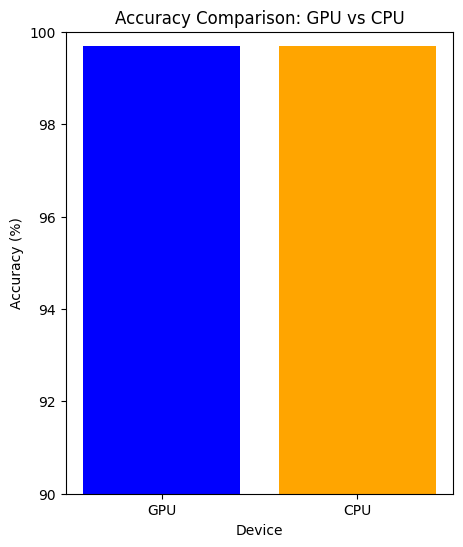

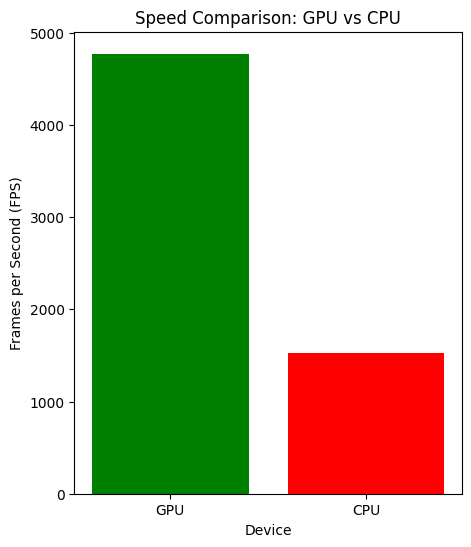

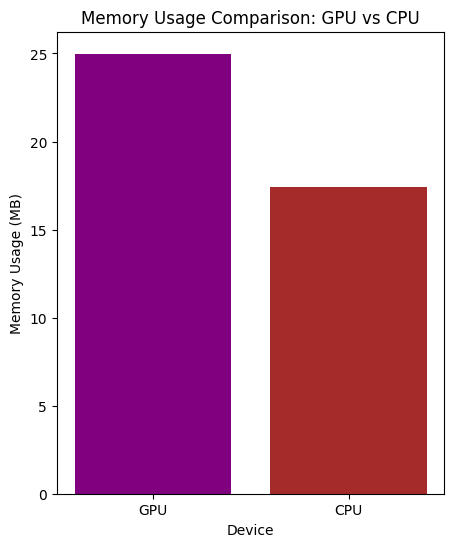

In [10]:
import matplotlib.pyplot as plt

# Accuracy Comparison
plt.figure(figsize=(5, 6))
plt.bar(["GPU", "CPU"], [accuracy_gpu, accuracy_cpu], color=['blue', 'orange'])
plt.xlabel("Device")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison: GPU vs CPU")
plt.ylim(90, 100)  # Adjust y-axis limits as needed
plt.show()

# Speed (FPS) Comparison
plt.figure(figsize=(5, 6))
plt.bar(["GPU", "CPU"], [fps_gpu, fps_cpu], color=['green', 'red'])
plt.xlabel("Device")
plt.ylabel("Frames per Second (FPS)")
plt.title("Speed Comparison: GPU vs CPU")
plt.show()

# Memory Usage Comparison
plt.figure(figsize=(5, 6))
# Use the variable you already defined for GPU memory usage
plt.bar(["GPU", "CPU"], [gpu_memory_used, cpu_memory_percent], color=['purple', 'brown'])
plt.xlabel("Device")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Comparison: GPU vs CPU")
plt.show()

In [11]:
# display the GPU and CPU processing time in both models

# Evaluate GPU model
start_time_gpu = time.time()
correct_gpu = 0
total_gpu = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_gpu += labels.size(0)
        correct_gpu += (predicted == labels).sum().item()

accuracy_gpu = 100 * correct_gpu / total_gpu
end_time_gpu = time.time()
fps_gpu = len(train_loader.dataset) / (end_time_gpu - start_time_gpu)
gpu_processing_time = end_time_gpu - start_time_gpu

print('Accuracy of the GPU-based OCR model on the test images: {} %'.format(accuracy_gpu))
print('Frames per second (GPU): {:.2f}'.format(fps_gpu))
print('GPU Processing Time: {:.4f} seconds'.format(gpu_processing_time))

# Evaluate CPU model
start_time_cpu = time.time()
correct_cpu = 0
total_cpu = 0
with torch.no_grad():
    for images, labels in train_loader:
        outputs = cpu_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_cpu += labels.size(0)
        correct_cpu += (predicted == labels).sum().item()

accuracy_cpu = 100 * correct_cpu / total_cpu
end_time_cpu = time.time()
fps_cpu = len(train_loader.dataset) / (end_time_cpu - start_time_cpu)
cpu_processing_time = end_time_cpu - start_time_cpu

print('Accuracy of the CPU-based OCR model on the test images: {} %'.format(accuracy_cpu))
print('Frames per second (CPU): {:.2f}'.format(fps_cpu))
print('CPU Processing Time: {:.4f} seconds'.format(cpu_processing_time))


Accuracy of the GPU-based OCR model on the test images: 99.69 %
Frames per second (GPU): 4696.19
GPU Processing Time: 12.7763 seconds
Accuracy of the CPU-based OCR model on the test images: 99.69 %
Frames per second (CPU): 1740.61
CPU Processing Time: 34.4707 seconds


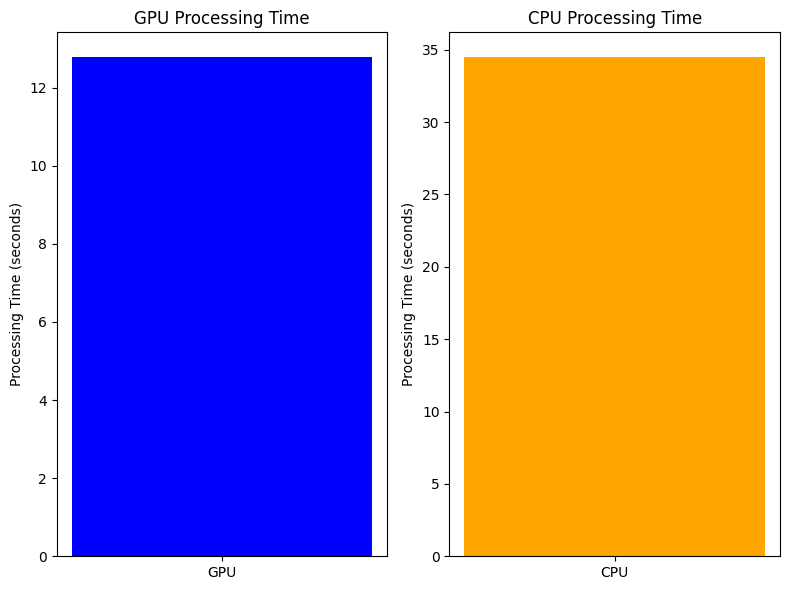

In [12]:
#display the processing time for both models in a subplot model

import matplotlib.pyplot as plt
# Processing Time Comparison
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.bar(["GPU"], [gpu_processing_time], color=['blue'])
plt.ylabel("Processing Time (seconds)")
plt.title("GPU Processing Time")

plt.subplot(1, 2, 2)
plt.bar(["CPU"], [cpu_processing_time], color=['orange'])
plt.ylabel("Processing Time (seconds)")
plt.title("CPU Processing Time")

plt.tight_layout()
plt.show()
